## Deteksi Emosi Pengguna Twitter

Deteksi emosi merupakan salah satu permasalahan yang dihadapi pada ***Natural Language Processing*** (NLP). Alasanya diantaranya adalah kurangnya dataset berlabel untuk mengklasifikasikan emosi berdasarkan data twitter. Selain itu, sifat dari data twitter yang dapat memiliki banyak label emosi (***multi-class***). Manusia memiliki berbagai emosi dan sulit untuk mengumpulkan data yang cukup untuk setiap emosi. Oleh karena itu, masalah ketidakseimbangan kelas akan muncul (***class imbalance***). Pada Ujian Tengah Semester (UTS) kali ini, Anda telah disediakan dataset teks twitter yang sudah memiliki label untuk beberapa kelas emosi. Tugas utama Anda adalah membuat model yang mumpuni untuk kebutuhan klasifikasi emosi berdasarkan teks.

### Informasi Data

Dataset yang akan digunakan adalah ****tweet_emotion.csv***. Berikut merupakan informasi tentang dataset yang dapat membantu Anda.

- Total data: 40000 data
- Label emosi: anger, boredom, empty, enthusiasm, fun, happiness, hate, love, neutral, relief, sadness, surprise, worry
- Jumlah data untuk setiap label tidak sama (***class imbalance***)
- Terdapat 3 kolom = 'tweet_id', 'sentiment', 'content'

### Penilaian UTS

UTS akan dinilai berdasaarkan 4 proses yang akan Anda lakukan, yaitu pra pengolahan data, ektraksi fitur, pembuatan model machine learning, dan evaluasi.

#### Pra Pengolahan Data

> **Perhatian**
> 
> Sebelum Anda melakukan sesuatu terhadap data Anda, pastikan data yang Anda miliki sudah "baik", bebas dari data yang hilang, menggunakan tipe data yang sesuai, dan sebagainya.
>

Data tweeter yang ada dapatkan merupakan sebuah data mentah, maka beberapa hal dapat Anda lakukan (namun tidak terbatas pada) yaitu,

1. Case Folding
2. Tokenizing
3. Filtering
4. Stemming

*CATATAN: PADA DATA TWITTER TERDAPAT *MENTION* (@something) YANG ANDA HARUS TANGANI SEBELUM MASUK KE TAHAP EKSTRAKSI FITUR*

#### Ekstrasi Fitur

Anda dapat menggunakan beberapa metode, diantaranya

1. Bag of Words (Count / TF-IDF)
2. N-gram
3. dan sebagainya

#### Pembuatan Model

Anda dibebaskan dalam memilih algoritma klasifikasi. Anda dapat menggunakan algoritma yang telah diajarkan didalam kelas atau yang lain, namun dengan catatan. Berdasarkan asas akuntabilitas pada pengembangan model machine learning, Anda harus dapat menjelaskan bagaimana model Anda dapat menghasilkan nilai tertentu.

#### Evaluasi

Pada proses evaluasi, minimal Anda harus menggunakan metric akurasi. Akan tetapi Anda juga dapat menambahkan metric lain seperti Recall, Precision, F1-Score, detail Confussion Metric, ataupun Area Under Curve (AUC).

### Lembar Pengerjaan
Lembar pengerjaan dimulai dari cell dibawah ini

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EDA



In [2]:
df = pd.read_csv('data/tweet_emotions.csv')

df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


<AxesSubplot: >

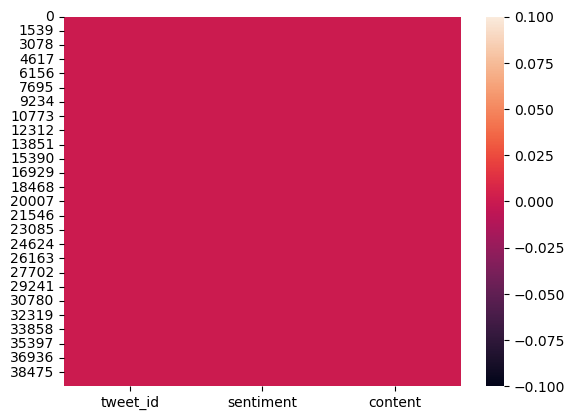

In [3]:
sns.heatmap(df.isna())

In [4]:
df.duplicated().sum()

0

In [5]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

<AxesSubplot: xlabel='sentiment', ylabel='count'>

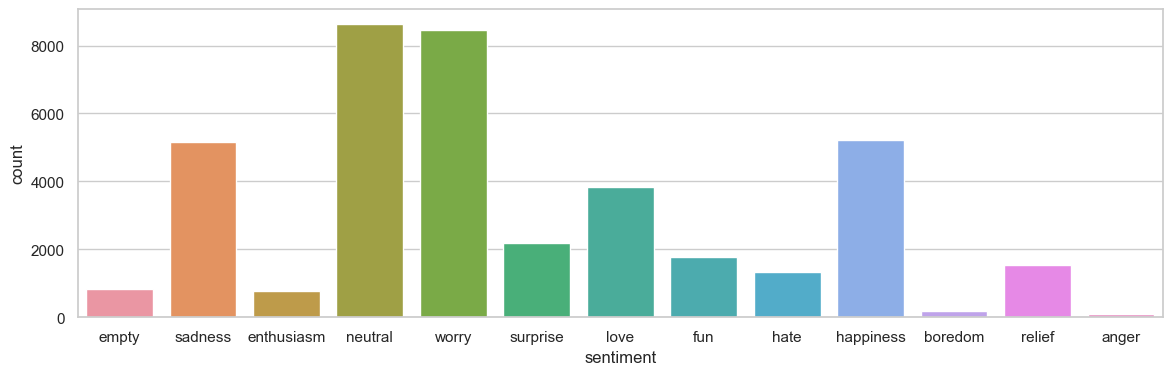

In [6]:
plt.figure(figsize=(14, 4))
sns.set_theme(style="whitegrid")
sns.countplot(x = df['sentiment'])

<AxesSubplot: >

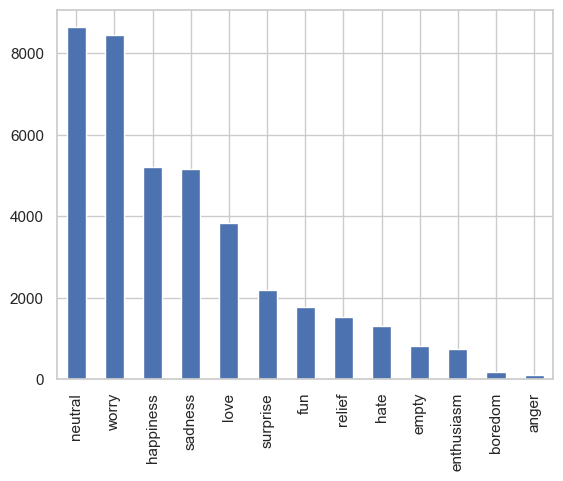

In [7]:
df['sentiment'].value_counts().plot(kind='bar')

In [8]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [10]:

# function to clean the tweets 
import re
def cleanTxt(text):
    text = re.sub(r'@\w+|#\w+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('\w+:\/\/\S+', '', text) # Removing hyperlink
    #remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', text)
    text.lower()
    return text

In [11]:
# case folding
temp = df['content'].str.lower()

In [27]:
# remove hashtag and mention using regex
import re

temp = temp.apply(lambda x: re.sub(r'@\w+|#\w+', '', x))

temp

0        know listenin bad habit earlier started freaki...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                  wants hang friends soon
4                   want trade someone houston tickets one
                               ...                        
39994                          succesfully following tayla
39996                               happy mothers day love
39997    happy mothers day mommies woman man long youre...
39998    wassup beautiful follow peep new hit singles w...
39999    bullet train tokyo gf visiting japan since thu...
Name: content, Length: 38401, dtype: object

In [26]:
# remove url using regex
temp = temp.apply(lambda x: re.sub(r'http\S+', '', x))

temp

0        know listenin bad habit earlier started freaki...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                  wants hang friends soon
4                   want trade someone houston tickets one
                               ...                        
39994                          succesfully following tayla
39996                               happy mothers day love
39997    happy mothers day mommies woman man long youre...
39998    wassup beautiful follow peep new hit singles w...
39999    bullet train tokyo gf visiting japan since thu...
Name: content, Length: 38401, dtype: object

In [25]:
# remove punctuation
import string

temp = temp.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

temp

0        know listenin bad habit earlier started freaki...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                  wants hang friends soon
4                   want trade someone houston tickets one
                               ...                        
39994                          succesfully following tayla
39996                               happy mothers day love
39997    happy mothers day mommies woman man long youre...
39998    wassup beautiful follow peep new hit singles w...
39999    bullet train tokyo gf visiting japan since thu...
Name: content, Length: 38401, dtype: object

In [24]:
# remove duplicate item
temp = temp.drop_duplicates()

temp

0        know listenin bad habit earlier started freaki...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                  wants hang friends soon
4                   want trade someone houston tickets one
                               ...                        
39994                          succesfully following tayla
39996                               happy mothers day love
39997    happy mothers day mommies woman man long youre...
39998    wassup beautiful follow peep new hit singles w...
39999    bullet train tokyo gf visiting japan since thu...
Name: content, Length: 38401, dtype: object

In [23]:
# remove number
temp = temp.apply(lambda x: re.sub(r'\d+', '', x))

temp

0        know listenin bad habit earlier started freaki...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                  wants hang friends soon
4                   want trade someone houston tickets one
                               ...                        
39994                          succesfully following tayla
39996                               happy mothers day love
39997    happy mothers day mommies woman man long youre...
39998    wassup beautiful follow peep new hit singles w...
39999    bullet train tokyo gf visiting japan since thu...
Name: content, Length: 39172, dtype: object

In [17]:
# check null value
temp.isnull().sum()

0

In [22]:
# remove whitespace
temp = temp.apply(lambda x: x.strip())

temp

0        know listenin bad habit earlier started freaki...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                  wants hang friends soon
4                   want trade someone houston tickets one
                               ...                        
39994                          succesfully following tayla
39996                               happy mothers day love
39997    happy mothers day mommies woman man long youre...
39998    wassup beautiful follow peep new hit singles w...
39999    bullet train tokyo gf visiting japan since thu...
Name: content, Length: 39172, dtype: object

STOPWORDS REMOVAL

In [21]:
#remove stopwords
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')
temp = temp.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

temp

0        know listenin bad habit earlier started freaki...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                  wants hang friends soon
4                   want trade someone houston tickets one
                               ...                        
39994                          succesfully following tayla
39996                               happy mothers day love
39997    happy mothers day mommies woman man long youre...
39998    wassup beautiful follow peep new hit singles w...
39999    bullet train tokyo gf visiting japan since thu...
Name: content, Length: 39172, dtype: object

LEMMETIZATION

In [32]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

temp = temp.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

temp

0        know listenin bad habit earlier started freaki...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                    want hang friend soon
4                    want trade someone houston ticket one
                               ...                        
39994                          succesfully following tayla
39996                                happy mother day love
39997    happy mother day mommy woman man long youre mo...
39998    wassup beautiful follow peep new hit single ww...
39999    bullet train tokyo gf visiting japan since thu...
Name: content, Length: 38401, dtype: object

TOKENIZATION

In [33]:
# tokenization
from nltk.tokenize import word_tokenize

temp = temp.apply(lambda x: word_tokenize(x))

temp

0        [know, listenin, bad, habit, earlier, started,...
1            [layin, n, bed, headache, ughhhhwaitin, call]
2                        [funeral, ceremonygloomy, friday]
3                               [want, hang, friend, soon]
4             [want, trade, someone, houston, ticket, one]
                               ...                        
39994                      [succesfully, following, tayla]
39996                           [happy, mother, day, love]
39997    [happy, mother, day, mommy, woman, man, long, ...
39998    [wassup, beautiful, follow, peep, new, hit, si...
39999    [bullet, train, tokyo, gf, visiting, japan, si...
Name: content, Length: 38401, dtype: object

In [39]:
# temp to df content_token
df['content_token'] = temp

,tweet_id,sentiment,content,content_token
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,"[know, listenin, bad, habit, earlier, started,..."
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,1956967696,sadness,Funeral ceremony...gloomy friday...,"[funeral, ceremonygloomy, friday]"
3,1956967789,enthusiasm,wants to hang out with friends SOON!,"[want, hang, friend, soon]"
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"[want, trade, someone, houston, ticket, one]"


In [41]:
df.isna().sum()

tweet_id            0
sentiment           0
content             0
content_token    1599
dtype: int64

In [42]:
# remove NaN data in content_token

df = df.dropna(subset=['content_token'])

df.isna().sum()

tweet_id         0
sentiment        0
content          0
content_token    0
dtype: int64

Finding & Removing Duplicate Synonim

In [45]:
# finding synonim of each token.
from nltk.corpus import wordnet
def find_synonym(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
    return synonyms

df['synonim'] = df['content_token'].apply(lambda x: [find_synonym(word) for word in x])

C:\Users\User\AppData\Local\Temp\ipykernel_1020\2456734751.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['synonim'] = df['content_token'].apply(lambda x: [find_synonym(word) for word in x])


In [46]:
df.head()

,tweet_id,sentiment,content,content_token,synonim
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,"[know, listenin, bad, habit, earlier, started,...","[[know, know, cognize, cognise, know, know, kn..."
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, headache, ughhhhwaitin, call]","[[], [nitrogen, N, atomic_number_7, north, due..."
2,1956967696,sadness,Funeral ceremony...gloomy friday...,"[funeral, ceremonygloomy, friday]","[[funeral], [], [Friday, Fri]]"
3,1956967789,enthusiasm,wants to hang out with friends SOON!,"[want, hang, friend, soon]","[[privation, want, deprivation, neediness, lac..."
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"[want, trade, someone, houston, ticket, one]","[[privation, want, deprivation, neediness, lac..."


In [48]:
# dictionary of word index
index_word = {}
for i, word in enumerate(df['content_token'].sum()):
    if word not in index_word:
        index_word[i] = word

In [50]:
words = [value for key, value in index_word.items()]

words

['know',
 'listenin',
 'bad',
 'habit',
 'earlier',
 'started',
 'freakin',
 'part',
 'layin',
 'n',
 'bed',
 'headache',
 'ughhhhwaitin',
 'call',
 'funeral',
 'ceremonygloomy',
 'friday',
 'want',
 'hang',
 'friend',
 'soon',
 'want',
 'trade',
 'someone',
 'houston',
 'ticket',
 'one',
 'repinging',
 'didnt',
 'go',
 'prom',
 'bc',
 'bf',
 'didnt',
 'like',
 'friend',
 'sleep',
 'im',
 'thinking',
 'old',
 'friend',
 'want',
 'he',
 'married',
 'damn',
 'amp',
 'want',
 'scandalous',
 'hmmm',
 'charlene',
 'love',
 'miss',
 'im',
 'sorry',
 'least',
 'friday',
 'cant',
 'fall',
 'asleep',
 'choked',
 'retainer',
 'ugh',
 'beat',
 'stupid',
 'song',
 'get',
 'next',
 'rude',
 'u',
 'watch',
 'hill',
 'london',
 'u',
 'realise',
 'tourture',
 'week',
 'week',
 'late',
 'watch',
 'itonlinelol',
 'got',
 'news',
 'storm',
 'electricity',
 'gone',
 'agreed',
 'sleepy',
 'even',
 'late',
 'fail',
 'lady',
 'gaga',
 'tweeted',
 'impressed',
 'video',
 'leaking',
 'know',
 'convinced',
 'al

In [51]:
# set synonyms dictionary using find_synonyms function
synonym_dict = {}
for word in words:
    synonym_dict.update({word : tuple([w.lower() for w in find_synonym(word)])})

synonym_dict

{'know': ('know',
  'know',
  'cognize',
  'cognise',
  'know',
  'know',
  'know',
  'know',
  'experience',
  'live',
  'acknowledge',
  'recognize',
  'recognise',
  'know',
  'know',
  'sleep_together',
  'roll_in_the_hay',
  'love',
  'make_out',
  'make_love',
  'sleep_with',
  'get_laid',
  'have_sex',
  'know',
  'do_it',
  'be_intimate',
  'have_intercourse',
  'have_it_away',
  'have_it_off',
  'screw',
  'fuck',
  'jazz',
  'eff',
  'hump',
  'lie_with',
  'bed',
  'have_a_go_at_it',
  'bang',
  'get_it_on',
  'bonk',
  'know',
  'know',
  'know'),
 'listenin': (),
 'bad': ('bad',
  'badness',
  'bad',
  'bad',
  'big',
  'bad',
  'tough',
  'bad',
  'spoiled',
  'spoilt',
  'regretful',
  'sorry',
  'bad',
  'bad',
  'uncollectible',
  'bad',
  'bad',
  'bad',
  'risky',
  'high-risk',
  'speculative',
  'bad',
  'unfit',
  'unsound',
  'bad',
  'bad',
  'bad',
  'forged',
  'bad',
  'defective',
  'badly',
  'bad',
  'badly',
  'bad'),
 'habit': ('habit',
  'wont',
  'habi

In [53]:
# remove duplicate synonym
for key, value in synonym_dict.items():
    synonym_dict[key] = tuple(set(value))

synonym_dict

{'know': ('fuck',
  'be_intimate',
  'bang',
  'have_it_off',
  'hump',
  'have_intercourse',
  'roll_in_the_hay',
  'have_a_go_at_it',
  'make_love',
  'have_sex',
  'screw',
  'jazz',
  'sleep_together',
  'lie_with',
  'make_out',
  'recognize',
  'live',
  'bonk',
  'do_it',
  'get_laid',
  'have_it_away',
  'cognize',
  'eff',
  'recognise',
  'experience',
  'acknowledge',
  'love',
  'bed',
  'cognise',
  'know',
  'get_it_on',
  'sleep_with'),
 'listenin': (),
 'bad': ('regretful',
  'big',
  'spoilt',
  'badly',
  'unfit',
  'tough',
  'high-risk',
  'spoiled',
  'defective',
  'speculative',
  'bad',
  'risky',
  'unsound',
  'sorry',
  'uncollectible',
  'forged',
  'badness'),
 'habit': ('use',
  'substance_abuse',
  'wont',
  'riding_habit',
  'habit',
  'drug_abuse'),
 'earlier': ('early',
  'in_the_beginning',
  'former',
  'earlier',
  'to_begin_with',
  'originally',
  'before',
  'other',
  'in_the_first_place',
  'sooner',
  'earliest'),
 'started': ('take_off',
  'b

In [55]:
# remove null value in synonym_dict
synonym_dict = {k: v for k, v in synonym_dict.items() if v}

synonym_dict

{'know': ('fuck',
  'be_intimate',
  'bang',
  'have_it_off',
  'hump',
  'have_intercourse',
  'roll_in_the_hay',
  'have_a_go_at_it',
  'make_love',
  'have_sex',
  'screw',
  'jazz',
  'sleep_together',
  'lie_with',
  'make_out',
  'recognize',
  'live',
  'bonk',
  'do_it',
  'get_laid',
  'have_it_away',
  'cognize',
  'eff',
  'recognise',
  'experience',
  'acknowledge',
  'love',
  'bed',
  'cognise',
  'know',
  'get_it_on',
  'sleep_with'),
 'bad': ('regretful',
  'big',
  'spoilt',
  'badly',
  'unfit',
  'tough',
  'high-risk',
  'spoiled',
  'defective',
  'speculative',
  'bad',
  'risky',
  'unsound',
  'sorry',
  'uncollectible',
  'forged',
  'badness'),
 'habit': ('use',
  'substance_abuse',
  'wont',
  'riding_habit',
  'habit',
  'drug_abuse'),
 'earlier': ('early',
  'in_the_beginning',
  'former',
  'earlier',
  'to_begin_with',
  'originally',
  'before',
  'other',
  'in_the_first_place',
  'sooner',
  'earliest'),
 'started': ('take_off',
  'begin',
  'origina

In [60]:
import collections
value_occurrrences = collections.Counter(synonym_dict.values())

filtered_synonym = {key: value for key, value in synonym_dict.items() if value_occurrrences[value]}

filtered_synonym

{'know': ('fuck',
  'be_intimate',
  'bang',
  'have_it_off',
  'hump',
  'have_intercourse',
  'roll_in_the_hay',
  'have_a_go_at_it',
  'make_love',
  'have_sex',
  'screw',
  'jazz',
  'sleep_together',
  'lie_with',
  'make_out',
  'recognize',
  'live',
  'bonk',
  'do_it',
  'get_laid',
  'have_it_away',
  'cognize',
  'eff',
  'recognise',
  'experience',
  'acknowledge',
  'love',
  'bed',
  'cognise',
  'know',
  'get_it_on',
  'sleep_with'),
 'bad': ('regretful',
  'big',
  'spoilt',
  'badly',
  'unfit',
  'tough',
  'high-risk',
  'spoiled',
  'defective',
  'speculative',
  'bad',
  'risky',
  'unsound',
  'sorry',
  'uncollectible',
  'forged',
  'badness'),
 'habit': ('use',
  'substance_abuse',
  'wont',
  'riding_habit',
  'habit',
  'drug_abuse'),
 'earlier': ('early',
  'in_the_beginning',
  'former',
  'earlier',
  'to_begin_with',
  'originally',
  'before',
  'other',
  'in_the_first_place',
  'sooner',
  'earliest'),
 'started': ('take_off',
  'begin',
  'origina

In [62]:
# function for augmenting data by replacing words with synonym using spacy
import random
sr = random.SystemRandom()
split_pattern = re.compile(r'\s+')
def data_augmentation(message, aug_range = 1):
    augmented_messsages = []
    for j in range(0, aug_range):
        new_message = ""
        for i in filter(None, split_pattern.split(message)):
            new_message = new_message + " " + sr.choice(filtered_synonym.get(i, [i]))
        augmented_messsages.append(new_message)
    return augmented_messsages

In [63]:
tweet_count = df.sentiment.value_counts().to_dict()

In [64]:
tweet_count

{'worry': 8237,
 'neutral': 8064,
 'sadness': 5045,
 'happiness': 5005,
 'love': 3605,
 'surprise': 2128,
 'fun': 1746,
 'relief': 1480,
 'hate': 1304,
 'empty': 764,
 'enthusiasm': 736,
 'boredom': 177,
 'anger': 110}

In [65]:
# get max intent count to match other minority classes through data augmentation
import operator
max_intent_count = max(tweet_count.items(), key=operator.itemgetter(1))[1]


BALANCING DATA

In [68]:
import math
import tqdm
newdf = pd.DataFrame()
for intent, count in tweet_count.items():
    count_diff = max_intent_count - count #difference to fill
    """
    multiplying a minority classes for multiplcation_count times
    """
    multiplication_count = math.ceil((count_diff) / count)
    if (multiplication_count):
        old_message_df = pd.DataFrame()
        new_message_df = pd.DataFrame()
        for message in tqdm.tqdm(df[df['sentiment'] == intent]['content'].values):
            # extracting existing minority class batch
            dummy1 = pd.DataFrame([message], columns = ['content'])
            dummy1['sentiment'] = intent
            # concat existing minority class batch
            old_message_df = pd.concat([old_message_df, dummy1])

            # creating new augmented batch from existing minority class
            new_messages = data_augmentation(message, multiplication_count)
            dummy2 = pd.DataFrame(new_messages, columns = ['content'])
            dummy2['sentiment'] = intent
            # concat new augmented batch
            new_message_df = pd.concat([new_message_df, dummy2])
        # select random data points from augmented data
        new_message_df = new_message_df.take(np.random.permutation(len(new_message_df))[:count_diff])
        # merge existing and augmented data points using concat
        newdf = pd.concat([newdf, old_message_df, new_message_df])
    else:
        newdf = pd.concat([newdf, df[df['sentiment'] == intent]])

100%|██████████| 110/110 [00:02<00:00, 41.41it/s]


In [69]:
newdf

,tweet_id,sentiment,content,content_token,synonim
5,1.956968e+09,worry,Re-pinging @ghostridah14: why didn't you go to...,"[repinging, didnt, go, prom, bc, bf, didnt, li...","[[], [], [go, spell, tour, turn, Adam, ecstasy..."
7,1.956969e+09,worry,Hmmm. http://www.djhero.com/ is down,[hmmm],[[]]
11,1.956970e+09,worry,Choked on her retainers,"[choked, retainer]","[[choke, choke, gag, fret, choke, scrag, choke..."
18,1.956971e+09,worry,@PerezHilton lady gaga tweeted about not being...,"[lady, gaga, tweeted, impressed, video, leakin...","[[lady, dame, madam, ma'am, lady, gentlewoman,..."
20,1.956972e+09,worry,@raaaaaaek oh too bad! I hope it gets better. ...,"[oh, bad, hope, get, better, ive, sleep, issue...","[[Ohio, Buckeye_State, OH], [bad, badness, bad..."
...,...,...,...,...,...
5,NaN,anger,too queasy for rig tomorrow.,NaN,NaN
37,NaN,anger,@natss91 vote_out pine_tree_state ampere shor...,NaN,NaN
58,NaN,anger,"@bcollinstattoo yes, boo for hang_glide throa...",NaN,NaN
73,NaN,anger,stick inwards unintelligent Jeuno with slacke...,NaN,NaN


In [70]:
newdf.value_counts('sentiment')

sentiment
anger         8237
boredom       8237
empty         8237
enthusiasm    8237
fun           8237
happiness     8237
hate          8237
love          8237
neutral       8237
relief        8237
sadness       8237
surprise      8237
worry         8237
dtype: int64

In [71]:
# save newdf to csv file
newdf.to_csv('data/augmented_data.csv', index=False)

In [73]:
#import clean data
clean_df = pd.read_csv('data/augmented_data.csv')

clean_df.head()

,tweet_id,sentiment,content,content_token,synonim
0,1.956968e+09,worry,Re-pinging @ghostridah14: why didn't you go to...,"['repinging', 'didnt', 'go', 'prom', 'bc', 'bf...","[[], [], ['go', 'spell', 'tour', 'turn', 'Adam..."
1,1.956969e+09,worry,Hmmm. http://www.djhero.com/ is down,['hmmm'],[[]]
2,1.956970e+09,worry,Choked on her retainers,"['choked', 'retainer']","[['choke', 'choke', 'gag', 'fret', 'choke', 's..."
3,1.956971e+09,worry,@PerezHilton lady gaga tweeted about not being...,"['lady', 'gaga', 'tweeted', 'impressed', 'vide...","[['lady', 'dame', 'madam', ""ma'am"", 'lady', 'g..."
4,1.956972e+09,worry,@raaaaaaek oh too bad! I hope it gets better. ...,"['oh', 'bad', 'hope', 'get', 'better', 'ive', ...","[['Ohio', 'Buckeye_State', 'OH'], ['bad', 'bad..."


In [74]:
clean_df.value_counts('sentiment')

sentiment
anger         8237
boredom       8237
empty         8237
enthusiasm    8237
fun           8237
happiness     8237
hate          8237
love          8237
neutral       8237
relief        8237
sadness       8237
surprise      8237
worry         8237
dtype: int64

<AxesSubplot: >

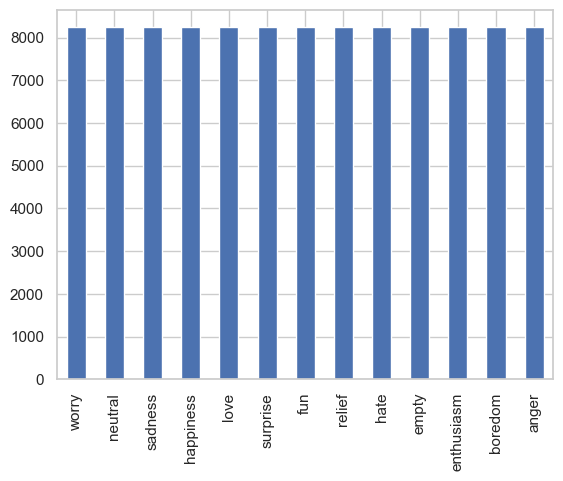

In [75]:
clean_df['sentiment'].value_counts().plot(kind='bar')

In [77]:
# cleaning the tweets using clean_tweet function

clean_df['clean_tweet'] = clean_df['content'].apply(lambda x: cleanTxt(x))

In [78]:
clean_df

,tweet_id,sentiment,content,content_token,synonim,clean_tweet
0,1.956968e+09,worry,Re-pinging @ghostridah14: why didn't you go to...,"['repinging', 'didnt', 'go', 'prom', 'bc', 'bf...","[[], [], ['go', 'spell', 'tour', 'turn', 'Adam...",Re pinging why didn t you go to prom BC my ...
1,1.956969e+09,worry,Hmmm. http://www.djhero.com/ is down,['hmmm'],[[]],Hmmm is down
2,1.956970e+09,worry,Choked on her retainers,"['choked', 'retainer']","[['choke', 'choke', 'gag', 'fret', 'choke', 's...",Choked on her retainers
3,1.956971e+09,worry,@PerezHilton lady gaga tweeted about not being...,"['lady', 'gaga', 'tweeted', 'impressed', 'vide...","[['lady', 'dame', 'madam', ""ma'am"", 'lady', 'g...",lady gaga tweeted about not being impressed b...
4,1.956972e+09,worry,@raaaaaaek oh too bad! I hope it gets better. ...,"['oh', 'bad', 'hope', 'get', 'better', 'ive', ...","[['Ohio', 'Buckeye_State', 'OH'], ['bad', 'bad...",oh too bad I hope it gets better I ve been ...
...,...,...,...,...,...,...
107076,NaN,anger,too queasy for rig tomorrow.,NaN,NaN,too queasy for rig tomorrow
107077,NaN,anger,@natss91 vote_out pine_tree_state ampere shor...,NaN,NaN,vote out pine tree state ampere shortly grou...
107078,NaN,anger,"@bcollinstattoo yes, boo for hang_glide throa...",NaN,NaN,yes boo for hang glide throats and earaches
107079,NaN,anger,stick inwards unintelligent Jeuno with slacke...,NaN,NaN,stick inwards unintelligent Jeuno with slacke...


In [80]:
# lower casing clean_tweet column

clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda x: x.lower())

clean_df

,tweet_id,sentiment,content,content_token,synonim,clean_tweet
0,1.956968e+09,worry,Re-pinging @ghostridah14: why didn't you go to...,"['repinging', 'didnt', 'go', 'prom', 'bc', 'bf...","[[], [], ['go', 'spell', 'tour', 'turn', 'Adam...",re pinging why didn t you go to prom bc my ...
1,1.956969e+09,worry,Hmmm. http://www.djhero.com/ is down,['hmmm'],[[]],hmmm is down
2,1.956970e+09,worry,Choked on her retainers,"['choked', 'retainer']","[['choke', 'choke', 'gag', 'fret', 'choke', 's...",choked on her retainers
3,1.956971e+09,worry,@PerezHilton lady gaga tweeted about not being...,"['lady', 'gaga', 'tweeted', 'impressed', 'vide...","[['lady', 'dame', 'madam', ""ma'am"", 'lady', 'g...",lady gaga tweeted about not being impressed b...
4,1.956972e+09,worry,@raaaaaaek oh too bad! I hope it gets better. ...,"['oh', 'bad', 'hope', 'get', 'better', 'ive', ...","[['Ohio', 'Buckeye_State', 'OH'], ['bad', 'bad...",oh too bad i hope it gets better i ve been ...
...,...,...,...,...,...,...
107076,NaN,anger,too queasy for rig tomorrow.,NaN,NaN,too queasy for rig tomorrow
107077,NaN,anger,@natss91 vote_out pine_tree_state ampere shor...,NaN,NaN,vote out pine tree state ampere shortly grou...
107078,NaN,anger,"@bcollinstattoo yes, boo for hang_glide throa...",NaN,NaN,yes boo for hang glide throats and earaches
107079,NaN,anger,stick inwards unintelligent Jeuno with slacke...,NaN,NaN,stick inwards unintelligent jeuno with slacke...


In [81]:
# function to remove stop words from clean_tweet column

def remove_stopwords(text):
    text = [word for word in text.split() if word not in stop]
    return " ".join(text)

In [82]:
# stopword removal

clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda x: remove_stopwords(x))

In [83]:
# function to lemmitize clean_tweet column

def lemmatization(text):
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)

In [85]:
# lemmitization

clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda x: lemmatization(x))

In [86]:
# tokenization using word_tokenize

clean_df['clean_tweet_token'] = clean_df['clean_tweet'].apply(lambda x: word_tokenize(x))

clean_df

,tweet_id,sentiment,content,content_token,synonim,clean_tweet,clean_tweet_token
0,1.956968e+09,worry,Re-pinging @ghostridah14: why didn't you go to...,"['repinging', 'didnt', 'go', 'prom', 'bc', 'bf...","[[], [], ['go', 'spell', 'tour', 'turn', 'Adam...",pinging go prom bc bf like friend,"[pinging, go, prom, bc, bf, like, friend]"
1,1.956969e+09,worry,Hmmm. http://www.djhero.com/ is down,['hmmm'],[[]],hmmm,[hmmm]
2,1.956970e+09,worry,Choked on her retainers,"['choked', 'retainer']","[['choke', 'choke', 'gag', 'fret', 'choke', 's...",choked retainer,"[choked, retainer]"
3,1.956971e+09,worry,@PerezHilton lady gaga tweeted about not being...,"['lady', 'gaga', 'tweeted', 'impressed', 'vide...","[['lady', 'dame', 'madam', ""ma'am"", 'lady', 'g...",lady gaga tweeted impressed video leaking know,"[lady, gaga, tweeted, impressed, video, leakin..."
4,1.956972e+09,worry,@raaaaaaek oh too bad! I hope it gets better. ...,"['oh', 'bad', 'hope', 'get', 'better', 'ive', ...","[['Ohio', 'Buckeye_State', 'OH'], ['bad', 'bad...",oh bad hope get better sleep issue lately,"[oh, bad, hope, get, better, sleep, issue, lat..."
...,...,...,...,...,...,...,...
107076,NaN,anger,too queasy for rig tomorrow.,NaN,NaN,queasy rig tomorrow,"[queasy, rig, tomorrow]"
107077,NaN,anger,@natss91 vote_out pine_tree_state ampere shor...,NaN,NaN,vote pine tree state ampere shortly group pay ...,"[vote, pine, tree, state, ampere, shortly, gro..."
107078,NaN,anger,"@bcollinstattoo yes, boo for hang_glide throa...",NaN,NaN,yes boo hang glide throat earache,"[yes, boo, hang, glide, throat, earache]"
107079,NaN,anger,stick inwards unintelligent Jeuno with slacke...,NaN,NaN,stick inwards unintelligent jeuno slacken wish...,"[stick, inwards, unintelligent, jeuno, slacken..."


FEATURES EXTRACTION

In [87]:
from sklearn.model_selection import train_test_split

# split data into train and test


X_train, X_test, y_train, y_test = train_test_split(clean_df['clean_tweet_token'], clean_df['sentiment'], test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((85664,), (21417,), (85664,), (21417,))

In [88]:
# vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train.astype('U'))

X_test = vectorizer.transform(X_test.astype('U'))

X_train.shape, X_test.shape

((85664, 31006), (21417, 31006))

MODELING

In [89]:
# model training

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil perhitungan akurasi Data Train : {acc_train}')
print(f'Hasil perhitungan akurasi Data Test  : {acc_test}')

Hasil perhitungan akurasi Data Train : 0.7067029323870003
Hasil perhitungan akurasi Data Test  : 0.5613297847504319


EVALUASI

In [90]:
# evaluation

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       anger       0.76      0.98      0.85      1651
     boredom       0.70      0.96      0.81      1630
       empty       0.73      0.62      0.67      1709
  enthusiasm       0.58      0.72      0.64      1603
         fun       0.59      0.55      0.57      1632
   happiness       0.41      0.35      0.38      1613
        hate       0.65      0.70      0.67      1596
        love       0.49      0.49      0.49      1647
     neutral       0.34      0.21      0.26      1679
      relief       0.52      0.60      0.56      1625
     sadness       0.43      0.31      0.36      1627
    surprise       0.63      0.37      0.47      1729
       worry       0.34      0.47      0.40      1676

    accuracy                           0.56     21417
   macro avg       0.55      0.56      0.55     21417
weighted avg       0.55      0.56      0.55     21417



In [91]:
print(confusion_matrix(y_test, y_pred_test))

[[1615   15    0    1    1    0    2    1    0    9    1    0    6]
 [  14 1559    4   11    1    2   16    1    3   12    2    0    5]
 [  52  111 1063   90   45   30   62   32   31   80   36   23   54]
 [  35   45   24 1151   29   47   49   46   26   75   26   16   34]
 [  49   58   37  108  891   99   44   95   40  100   28   35   48]
 [  34   39   31  102  136  557   30  207  102  130   44   49  152]
 [  45   55   39   51   29    6 1115   13   20   59   53   24   87]
 [  41   49   34   81   88  155   36  801   62   91   46   46  117]
 [  50   59   44   79   79  160   65  100  351   92  129   57  414]
 [  39   72   30   79   47   64   46   83   44  977   40   28   76]
 [  54   73   45   75   48   64  109   73   71   75  505   62  373]
 [  79   59   71  113   80   72   75  114   68  138   64  641  155]
 [  24   31   32   44   34  101   64   62  207   56  196   29  796]]


TRY WITH SVC

In [92]:
# Model using Linear SVC

from sklearn.svm import LinearSVC

# Inisiasi LinearSVC

lsvc = LinearSVC()

# Fit model
lsvc.fit(X_train, y_train)

# Prediksi dengan data training

y_pred_train = lsvc.predict(X_train)

# Evaluasi akurasi data training

acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training

y_pred_test = lsvc.predict(X_test)

# Evaluasi akurasi data training

acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi

print(f'Hasil perhitungan akurasi Data Train : {acc_train}')

print(f'Hasil perhitungan akurasi Data Test  : {acc_test}')

Hasil perhitungan akurasi Data Train : 0.8585636906985431
Hasil perhitungan akurasi Data Test  : 0.6473362282299108


In [93]:
# evaluation

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       anger       0.92      0.99      0.96      1651
     boredom       0.89      0.98      0.93      1630
       empty       0.72      0.80      0.76      1709
  enthusiasm       0.69      0.82      0.75      1603
         fun       0.68      0.71      0.70      1632
   happiness       0.47      0.42      0.44      1613
        hate       0.74      0.82      0.78      1596
        love       0.58      0.59      0.59      1647
     neutral       0.35      0.27      0.30      1679
      relief       0.63      0.70      0.66      1625
     sadness       0.50      0.42      0.45      1627
    surprise       0.64      0.59      0.61      1729
       worry       0.39      0.33      0.35      1676

    accuracy                           0.65     21417
   macro avg       0.63      0.65      0.64     21417
weighted avg       0.63      0.65      0.64     21417



In [94]:
print(confusion_matrix(y_test, y_pred_test))

[[1642    0    2    1    0    0    2    0    1    1    1    0    1]
 [   1 1593    6    5    1    2   12    0    2    6    2    0    0]
 [   8   22 1363   46   26   15   29   15   51   43   34   32   25]
 [   5   10   27 1309   21   35   23   22   31   49   33   23   15]
 [   8   12   43   48 1162   74   31   65   44   57   30   38   20]
 [  11   13   48   93  126  672   26  174  123  111   59   87   70]
 [  11   13   37   20   25    9 1309    6   29   29   32   33   43]
 [  17   12   40   62   54  136   32  978   66   75   50   66   59]
 [  26   21   82   76   88  159   46  113  451   90  139   98  290]
 [   4   18   39   53   47   58   29   67   51 1136   34   49   40]
 [  19   37   81   46   41   79   99   70   93   72  684   76  230]
 [  13   12   65   75   60   74   50   83   80   69   54 1016   78]
 [  14   20   50   60   60  112   82   86  278   70  229   66  549]]


In [95]:
# Model using Logistic Regression

from sklearn.linear_model import LogisticRegression

# Inisiasi LogisticRegression

lr = LogisticRegression()

# Fit model

lr.fit(X_train, y_train)

# Prediksi dengan data training

y_pred_train = lr.predict(X_train)

# Evaluasi akurasi data training

acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training

y_pred_test = lr.predict(X_test)

# Evaluasi akurasi data training

acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi

print(f'Hasil perhitungan akurasi Data Train : {acc_train}')

print(f'Hasil perhitungan akurasi Data Test  : {acc_test}')

c:\Users\User\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hasil perhitungan akurasi Data Train : 0.7067729734777737
Hasil perhitungan akurasi Data Test  : 0.5668861185039922
